In [7]:
import matplotlib.pyplot as plt

def trapmf(x, a, b, c, d):
    left_slope = (x-a)/(b-a) if b != a else 0
    right_slope = (d-x)/(d-c) if d != c else 0
    return max(min(left_slope, 1, right_slope), 0)

def trimf(x, a, b, c):
    return max(min((x-a)/(b-a), (c-x)/(c-b)), 0)

In [8]:
jumlah_pembelian = {'universe': range(0, 10001)}
frekuensi_pelanggan = {'universe': range(0, 21)}
tingkat_diskon = {'universe': range(0, 31)}


In [9]:
jumlah_pembelian['sedikit'] = [trapmf(x, 0, 0, 2000, 4000) for x in jumlah_pembelian['universe']]
jumlah_pembelian['sedang'] = [trimf(x, 2000, 5000, 8000) for x in jumlah_pembelian['universe']]
jumlah_pembelian['banyak'] = [trapmf(x, 6000, 8000, 10000, 10000) for x in jumlah_pembelian['universe']]

In [10]:
frekuensi_pelanggan['jarang'] = [trapmf(x, 0, 0, 3, 5) for x in frekuensi_pelanggan['universe']]
frekuensi_pelanggan['sedang'] = [trimf(x, 3, 10, 15) for x in frekuensi_pelanggan['universe']]
frekuensi_pelanggan['sering'] = [trapmf(x, 10, 15, 20, 20) for x in frekuensi_pelanggan['universe']]



In [11]:
tingkat_diskon['rendah'] = [trapmf(x, 0, 0, 5, 10) for x in tingkat_diskon['universe']]
tingkat_diskon['sedang'] = [trimf(x, 5, 15, 25) for x in tingkat_diskon['universe']]
tingkat_diskon['tinggi'] = [trapmf(x, 20, 25, 30, 30) for x in tingkat_diskon['universe']]

In [12]:
jumlah_pembelian_input = 7000
frekuensi_pelanggan_input = 12

In [14]:
jumlah_pembelian_membership = {
    'sedikit': trapmf(jumlah_pembelian_input, 0, 0, 2000, 4000),
    'sedang': trimf(jumlah_pembelian_input, 2000, 5000, 8000),
    'banyak': trapmf(jumlah_pembelian_input, 6000, 8000, 10000, 10000)}

In [16]:
frekuensi_pelanggan_membership = {
    'jarang': trapmf(frekuensi_pelanggan_input, 0, 0, 3, 5),
    'sedang': trimf(frekuensi_pelanggan_input, 3, 10, 15),
    'sering': trapmf(frekuensi_pelanggan_input, 10, 15, 20, 20)
}


In [17]:
rules = [
    (min(jumlah_pembelian_membership['banyak'], frekuensi_pelanggan_membership['sering']), 'tinggi'),
    (min(jumlah_pembelian_membership['sedang'], frekuensi_pelanggan_membership['sedang']), 'sedang'),
    (min(jumlah_pembelian_membership['sedikit'], frekuensi_pelanggan_membership['jarang']), 'rendah')
]

output_membership = {
    'rendah': 0,
    'sedang': 0,
    'tinggi': 0
}

for rule in rules:
    output_membership[rule[1]] = max(output_membership[rule[1]], rule[0])

In [18]:
defuzz_numerator = 0
defuzz_denominator = 0
for x in tingkat_diskon['universe']:
    membership = max(
        output_membership['rendah'] * trapmf(x, 0, 0, 5, 10),
        output_membership['sedang'] * trimf(x, 5, 15, 25),
        output_membership['tinggi'] * trapmf(x, 20, 25, 30, 30)
    )
    defuzz_numerator += x * membership
    defuzz_denominator += membership

final_output = defuzz_numerator / defuzz_denominator if defuzz_denominator != 0 else 0


In [19]:
print(f"Jumlah Pembelian: {jumlah_pembelian_input}")
print(f"Frekuensi Pelanggan: {frekuensi_pelanggan_input}")
print(f"Tingkat Diskon yang diberikan: {final_output:.2f}%")

Jumlah Pembelian: 7000
Frekuensi Pelanggan: 12
Tingkat Diskon yang diberikan: 15.00%


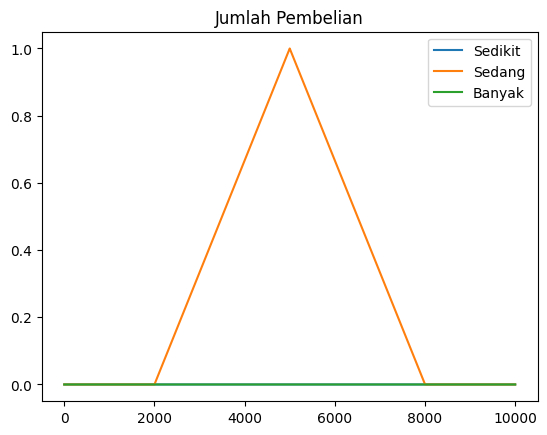

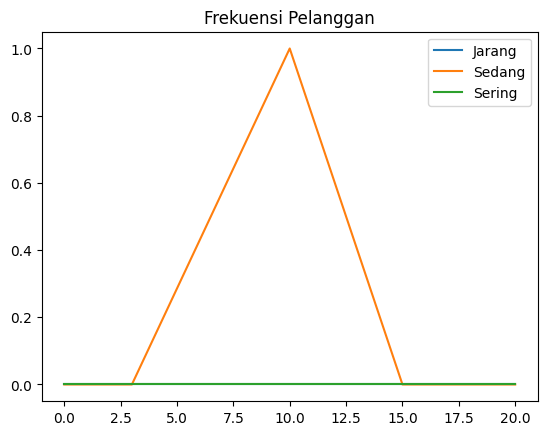

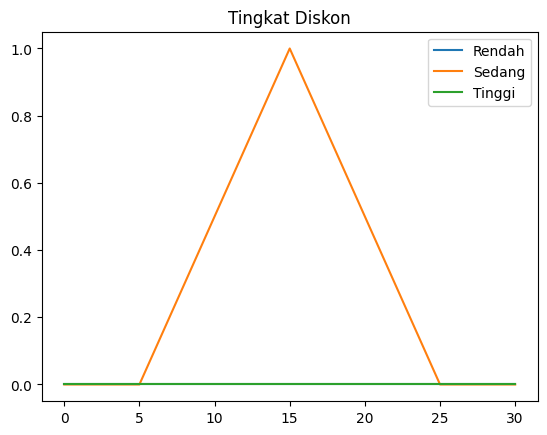

In [20]:
plt.plot(jumlah_pembelian['universe'], jumlah_pembelian['sedikit'], label='Sedikit')
plt.plot(jumlah_pembelian['universe'], jumlah_pembelian['sedang'], label='Sedang')
plt.plot(jumlah_pembelian['universe'], jumlah_pembelian['banyak'], label='Banyak')
plt.title('Jumlah Pembelian')
plt.legend()
plt.show()

plt.plot(frekuensi_pelanggan['universe'], frekuensi_pelanggan['jarang'], label='Jarang')
plt.plot(frekuensi_pelanggan['universe'], frekuensi_pelanggan['sedang'], label='Sedang')
plt.plot(frekuensi_pelanggan['universe'], frekuensi_pelanggan['sering'], label='Sering')
plt.title('Frekuensi Pelanggan')
plt.legend()
plt.show()

plt.plot(tingkat_diskon['universe'], tingkat_diskon['rendah'], label='Rendah')
plt.plot(tingkat_diskon['universe'], tingkat_diskon['sedang'], label='Sedang')
plt.plot(tingkat_diskon['universe'], tingkat_diskon['tinggi'], label='Tinggi')
plt.title('Tingkat Diskon')
plt.legend()
plt.show()